## 项目代码测试

In [2]:
# 这是导入的第三方包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
from datetime import datetime
import os
import math
# 这是自己写的其它模块文件
import fund # 基金计算模块
import index_handler as ih # 指数数据处理模块
import date_handler as dh # 日期处理模块
import draw_plot as dp # 绘图模块

In [3]:
data = pd.read_excel("data/中金量化测试数据.xlsx", index_col = 0)
name_list = data.columns
date_list = list(data.loc["日期"])
data = data.drop("日期", axis = 0)
the_fund = fund.Fund(name_list[0], date_list[0], data[name_list[0]])
#the_fund.basic_data.to_excel("output/计算结果-非指增-2023122242004.xlsx")

In [9]:
dicts = the_fund.all_month_return()
pd.DataFrame(list(dicts.values())).to_excel("月度数据测试.xlsx")

C:\Users\3590\AppData\Local\Temp\ipykernel_20596\4143356286.py:2: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  pd.DataFrame(list(dicts.values())).to_excel("月度数据测试.xlsx")


In [4]:
index_data = pd.read_excel("data/指数数据.xlsx", index_col = 0)
index_data = ih.pre_handle_date(index_data)
index_data = ih.standardlize_index(index_data, dh.find_closest_date(the_fund.get_first_netval_date(), index_data.index))
# 将指数数据与净值数据连接且对齐
merged_data = the_fund.basic_data.merge(index_data, how = "left", left_index = True, right_index = True)
merged_data

,沣京价值增强一期,沣京价值增强一期-收益率,沣京价值增强一期-回撤,沣京价值增强一期-标准化,中证500指数,沪深300指数
2007-09-06,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-14,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-21,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-28,NaN,NaN,NaN,NaN,NaN,NaN
2007-10-12,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-09-15,1.9482,-0.000769,-0.174806,1.9482,0.857481,1.053241
2023-09-22,1.9480,-0.000103,-0.174891,1.9480,0.856602,1.061805
2023-09-28,1.9180,-0.015400,-0.187598,1.9180,0.855392,1.047772
2023-10-13,1.9096,-0.004380,-0.191156,1.9096,0.846766,1.040358


c:\Users\3590\Desktop\自动化项目工程文件\draw_plot.py:126: UserWarning: FixedFormatter should only be used together with FixedLocator
  self.ax.set_yticklabels(list(map(lambda elem : round(elem, 1), self.ax.get_yticks())),


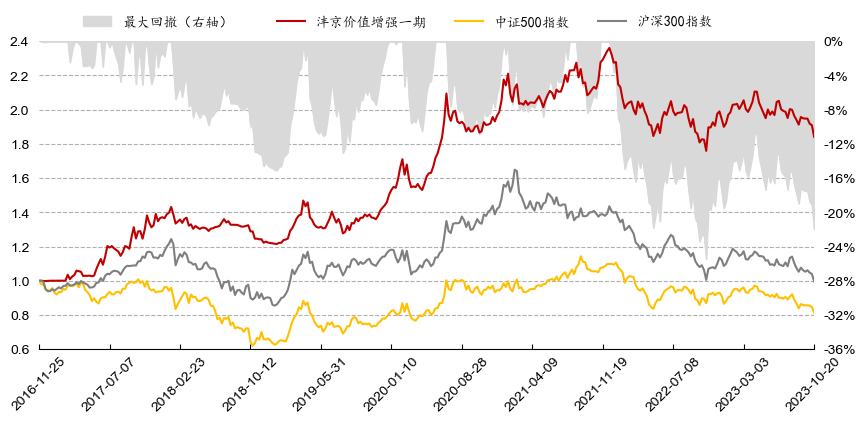

In [5]:
dp.GraphDrawer(merged_data[["沣京价值增强一期-标准化", "中证500指数", "沪深300指数"]], 
            merged_data['沣京价值增强一期-回撤'], the_fund.fund_name).do_drawing()

## 写入 Word

一些知乎简单教程： https://zhuanlan.zhihu.com/p/652737528?utm_id=0

微软官方文档参考：https://learn.microsoft.com/zh-cn/office/vba/api/word.htmldivision.leftindent

In [237]:
import win32com.client as win32
from PIL import ImageGrab

word_app = win32.gencache.EnsureDispatch('Word.Application') # 创建 WORD APP 应用程序
word_app.Visible = True #显示 word 程序
our_doc = word_app.Documents.Open(r"C:\Users\3590\Desktop\自动化项目工程文件\我的测试文档.docx") # 打开我的文档 
our_doc

cursor = word_app.Selection # 获取光标
section_title = "1. 中金量化-银河海山 1 号【CTA 日内短线高频策略】"
chinese_font = "楷体"
english_font = "Times New Roman"
font_size = 12
cursor.Text = section_title
cursor.Font.Name = chinese_font
cursor.Font.Name = english_font
cursor.Font.Size = font_size
cursor.Font.Bold = True
# 取消选中，然后下移
cursor.MoveDown(win32.constants.wdParagraph, 1)
cursor.Text = "\r"

In [56]:
this_paragraph = cursor.Paragraphs.Add()
this_paragraph_range = this_paragraph.Range
#指定文件的完整路径
picture_path = r"C:\Users\3590\Desktop\新需求\图像测试.svg"
#在当前的段落中插入图片
this_paragraph_range.InlineShapes.AddPicture(picture_path)
# 取消选中并且下移
cursor.MoveDown(win32.constants.wdParagraph, 1)

1

In [47]:
cursor.Text = "数据来源：中金量化，Wind; "
font_size = 10.5
cursor.Font.Name = chinese_font
cursor.Font.Name = english_font
cursor.Font.Size = font_size
cursor.Font.Bold = False
paragraph_format = cursor.ParagraphFormat
paragraph_format.LineSpacingRule = win32.constants.wdLineSpaceSingle # 设置单倍行距

## 下面是一些学习内容

In [211]:
import win32com.client as win32
from PIL import ImageGrab

word_app = win32.gencache.EnsureDispatch('Word.Application') # 创建 WORD APP 应用程序
word_app.Visible = True #显示 word 程序
our_doc = word_app.Documents.Open(r"C:\Users\3590\Desktop\自动化项目工程文件\我的测试文档.docx") # 打开我的文档 
our_doc

cursor = word_app.Selection # 获取光标
section_title = "1. 中金量化-银河海山 1 号【CTA 日内短线高频策略】"
chinese_font = "楷体"
english_font = "Times New Roman"
font_size = 12
cursor.Text = section_title
cursor.Font.Name = chinese_font
cursor.Font.Name = english_font
cursor.Font.Size = font_size
cursor.Font.Bold = True
# cursor() 获取灰色选中部分的内容


In [274]:
test_p = """
分年度看，2021年从2月10日到年底收益26.3%、2022年收益1.4%、2023年截至12月6日收益14.2%。中金量化-汉江5号产品的胜率较高，除2022年之外，各年度均获得了不错的正收益，显著跑赢CTA套利细分策略指数，与南华商品指数不分伯仲。
"""
cursor.Font.Name = chinese_font
cursor.Font.Name = english_font
cursor.Font.Size = 10.5
cursor.Font.Bold = False
cursor.Text = test_p
# 移动光标到段落的开头
cursor.MoveUp(win32.constants.wdParagraph, 1)
cursor.MoveDown(win32.constants.wdParagraph, 1)
cursor.InsertBefore("    ")
# 获取选中光标所在段落，调整该段落格式
paragraph_format = cursor.ParagraphFormat
paragraph_format.wdLineSpaceAtLeast = win32.constants.wdLineSpaceAtLeast # 需要指定行距之最小值是多少磅
paragraph_format.LineSpacing = 15 # 15 pond 1.25x 行距
paragraph_format.Alignment = 0 # 4 是两端对齐

In [266]:
cursor = word_app.Selection
# 移动光标到段落的开头
cursor.MoveUp(win32.constants.wdParagraph, 1)
# 将光标从本段移动到下一段开头[若没有下一段，则移动到本段末尾]
cursor.MoveDown(win32.constants.wdParagraph, 1)

1

## Excel 学习内容

虽然下面是Python代码，但本质上是VBA，语法应该参考西海岸著名科技大厂的官方文档

https://learn.microsoft.com/zh-cn/office/vba/api/excel.axis.ticklabels

In [232]:
import win32com.client as win32
excel_app = win32.Dispatch('Excel.Application') # 创建 Excel APP 应用程序
excel_app.Visible = True #显示 word 程序
excel_file = excel_app.Workbooks.Open(r"D:\study\实习文件\办公软件自动化测试\新测试数据.xlsx") # 打开我的Excel
excel_sheet1 = excel_file.Worksheets("Sheet1") # 获取 Sheet1 对象
used_range = excel_sheet1.UsedRange # 获得使用区域对象
n_rows = used_range.Rows.Count # 使用区域一共有多少行？
n_cols = used_range.Columns.Count # 使用区域一共多少列？
used_range.Font.Name = "宋体" # 调整使用区域的所有字体
excel_sheet1.Range("C6:C8").Font.Name = "Times New Roman" # 调整部分区域的字体
# MsoChartElementType 是枚举类型，请查阅文档

In [233]:
chart = excel_sheet1.Shapes.AddChart(Width=18 * 28.346,Height=8.37 * 28.346).Select() # 对该sheet对象的所有列添加图表
chart = excel_file.ActiveChart # 获取当前选中的图表
chart.SetSourceData(excel_sheet1.UsedRange)
color_dict = {
    "deep_red" : 0xC00000,
    "orange" : 0xFFC000,
    "deep_grey" : 0x7F7F7F,
    "shallow_red" : 0xFFCCCC,
    "shallow_grey" : 0xBFBFBF
}
def convert_to_RGB(BGR_value: int):
    """ 通过位运算将 BGR 转为 RGB """
    blue = (BGR_value & 0xFF0000) >> 16
    green = (BGR_value & 0x00FF00) >> 8
    red = BGR_value & 0x0000FF
    return (red << 16) | (green << 8) | blue
color_list = list(color_dict.keys())
for i in range(n_cols - 1):
    draw_type = 76 if  "回撤" in chart.SeriesCollection(i + 1).Name else 4
    chart.SeriesCollection(i + 1).ChartType = draw_type # 修改类型
    chart.SeriesCollection(i + 1).Format.Line.ForeColor.RGB = convert_to_RGB(color_dict.get(color_list[i]))
    chart.SeriesCollection(i + 1).Format.Line.Weight = 1.5
    if draw_type == 76:
        chart.SeriesCollection(i + 1).AxisGroup = 2
        chart.SeriesCollection(i + 1).Format.Fill.ForeColor.RGB = convert_to_RGB(color_dict.get(color_list[i]))

In [234]:
chart.ChartArea.Format.Fill.Visible=False # 图片无填充
chart.ChartArea.Format.Line.Visible=False #图片无边框
# 标签置于顶部，其它数值参考 https://learn.microsoft.com/zh-cn/office/vba/api/excel.xllegendposition
chart.Legend.Position = -4160 
chart.Legend.Font.Name = "楷体"
chart.Legend.Font.Size = 8
# Axes() 第一个参数表示坐标轴类型，1是横轴，2是纵轴.
chart.Axes(1).TickLabels.Font.Name = "Arial" # 设置坐标轴字体
chart.Axes(1).TickLabels.Font.Size = 8 # 设置坐标轴大小
chart.Axes(1).MajorUnit  = 3 # 设置坐标间隔
chart.Axes(1).TickLabels.NumberFormat  = "yyyy-mm" # 设置数字格式
chart.Axes(1).Border.Weight =  win32.constants.xlThin
chart.Axes(1).Border.Color =  0x000000
chart.Axes(1).MajorTickMark  =  win32.constants.xlTickMarkInside
#chart.Axes(1).MinorTickMark =  win32.constants.xlTickMarkInside


chart.Axes(2, 1).TickLabels.Font.Name = "Arial" # 设置坐标轴字体
chart.Axes(2, 1).TickLabels.Font.Size = 8 # 设置坐标轴大小
#chart.Axes(2, 2).MajorUnit  = 0.2 # 设置坐标间隔
chart.Axes(2, 1).TickLabels.NumberFormat  = "0.00"

chart.Axes(2, 2).TickLabels.Font.Name = "Arial" # 设置坐标轴字体
chart.Axes(2, 2).TickLabels.Font.Size = 8 # 设置坐标轴大小
chart.Axes(2, 2).TickLabels.NumberFormat  = "0.0%"

chart.Axes(2, 2).Format.Line.Visible = False # 纵轴刻度线消失
chart.Axes(2, 1).Format.Line.Visible = False

chart.Axes(2, 1).HasMajorGridlines  = True
chart.Axes(2, 1).MajorGridlines.Border.Color = 0xD9D9D9
chart.Axes(2, 1).MajorGridlines.Border.LineStyle = win32.constants.xlDash

chart.ChartArea.Format.Fill.Transparency = 1 
chart.PlotArea.Interior.ColorIndex = False

In [238]:
# 复制粘贴到 WORD
chart.ChartArea.Copy()
cursor.Paste()